In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!conda install -c conda-forge pyvcf

# Task 3-6

Zadania 3-6 wykorzystują jako dane wejściowe plik w formacie VCF skompresowany
bgzip’em: vcf.gz [ok. 300Mb]. W pliku są adnotacje wariantów wygenerowane programami
SnpEff/SnpSift. Jeżeli przetwarzanie pliku będzie stwarzało problemy ze względu na jego
rozmiar - znajdź kreatywne rozwiązanie

3. Stwórz plik VCF, który będzie zawierał wszystkie warianty z pliku wejściowego
zawierające się pomiędzy chr12:112,204,691 a chr12:112,247,789.
Komendę/program oraz wynikowy plik VCF umieść w repozytorium.

# Task 3

In [2]:
!ls -l

total 2964020
-rw-r--r--. 1 root   root  2680081025 Dec 17 08:54 CPCT02220079.annotated.processed.vcf
-rw-r--r--. 1 root   root   355053727 Dec 17 08:01 CPCT02220079.annotated.processed.vcf.gz
-rwxrwxrwx. 1 root   root          29 Dec 16 11:08 readme.md
-rw-r--r--. 1 jovyan users       2562 Dec 17 08:19 task_1.ipynb
-rw-r--r--. 1 jovyan users       2603 Dec 17 08:41 task_2.ipynb
-rw-r--r--. 1 jovyan users       2419 Dec 17 09:07 Untitled1.ipynb


In [14]:
!vcftools --gzvcf ./CPCT02220079.annotated.processed.vcf --chr 12 --from-bp 112204691 --to-bp 112247789 --recode --out ./chr12.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ./CPCT02220079.annotated.processed.vcf
	--chr 12
	--to-bp 112247789
	--out ./chr12.vcf
	--recode
	--from-bp 112204691

Using zlib version: 1.2.11
After filtering, kept 1 out of 1 Individuals
Outputting VCF file...
After filtering, kept 9 out of a possible 5062982 Sites
Run Time = 6.00 seconds


# Task 4

Narysuj histogramy długości insercji i delecji w pliku wejściowym dla każdego z
chromosomów. Rysunek i tabelkę umieść w repozytorium.

In [9]:
!vcftools --gzvcf ./CPCT02220079.annotated.processed.vcf.gz  --keep-only-indels --out ./indels.vcf --keep-INFO-all --recode --recode-INFO-all


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ./CPCT02220079.annotated.processed.vcf.gz
	--recode-INFO-all
	--keep-only-indels
	--out ./indels.vcf
	--recode

Using zlib version: 1.2.11
After filtering, kept 1 out of 1 Individuals
Outputting VCF file...
After filtering, kept 915574 out of a possible 5062982 Sites
Run Time = 32.00 seconds


In [4]:
# 1	39487	.	A	AC	163.37	PASS	AC=1;AF=0.5;AN=2;BaseQRankSum=0;ClippingRankSum=0;DP=8;ExcessHet=3.0103;FS=0;MLEAC=1;MLEAF=0.5;MQ=26.2;MQRankSum=-0.319;QD=20.42;ReadPosRankSum=-0.887;SOR=1.
# 402	GT:AD:DP:GQ:PL	0/1:1,7:8:8:200,0,8

columns_free=["CHROM","POS","ID","REF","ALT","QUAL","FILTER","TO_PROCESS", "FORMAT", "SAMPLE"]
df = pd.read_csv("./indels.vcf.recode.vcf", comment='#', sep="\t", names=columns_free)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.shape

(915373, 10)

In [6]:
df.head(3)

CHROM    POS ID                                     REF ALT     QUAL FILTER  \
0     1  10146  .                                      AC   A  6557.73   PASS   
1     1  10403  .  ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC   A   178.73   PASS   
2     1  10616  .                  CCGCCGTTGCAAAGGCGCGCCG   C   457.73   PASS   

                                          TO_PROCESS                  FORMAT  \
0  AC=2;AF=1;AN=2;DP=771;ExcessHet=3.0103;FS=0;ML...          GT:AD:DP:GQ:PL   
1  AC=1;AF=0.5;AN=2;BaseQRankSum=1.04;ClippingRan...  GT:AD:DP:GQ:PGT:PID:PL   
2  AC=2;AF=1;AN=2;DP=15;ExcessHet=3.0103;FS=0;MLE...          GT:AD:DP:GQ:PL   

                                              SAMPLE  
0                       1/1:0,731:731:99:6595,1525,0  
1  0/1:8,6:14:99:0|1:10403_ACCCTAACCCTAACCCTAACCC...  
2                            1/1:0,11:11:33:495,33,0

In [7]:
df_temp = df[["CHROM", "REF","ALT"]].copy()
df_temp

CHROM                                     REF  ALT
0          1                                      AC    A
1          1  ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC    A
2          1                  CCGCCGTTGCAAAGGCGCGCCG    C
3          1                                     CAG    C
4          1                                      TC    T
...      ...                                     ...  ...
915368     Y                                       G  GCT
915369     Y                                       C   CT
915370     Y                                       T   TC
915371     Y                                      GT    G
915372    MT                                       T   TC

[915373 rows x 3 columns]

In [8]:
df_temp["ABS"] = abs(df["REF"].str.len() - df["ALT"].str.len())
df_temp

CHROM                                     REF  ALT  ABS
0          1                                      AC    A    1
1          1  ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC    A   37
2          1                  CCGCCGTTGCAAAGGCGCGCCG    C   21
3          1                                     CAG    C    2
4          1                                      TC    T    1
...      ...                                     ...  ...  ...
915368     Y                                       G  GCT    2
915369     Y                                       C   CT    1
915370     Y                                       T   TC    1
915371     Y                                      GT    G    1
915372    MT                                       T   TC    1

[915373 rows x 4 columns]

In [19]:
df_temp.to_csv("./Task4.tsv", sep="\t", index=False)

In [9]:
temp = df_temp.sample(n=1000, random_state=1)
temp

CHROM        REF   ALT  ABS
170324     3          T    TA    1
474257     9          A    AT    1
357602     6         TA     T    1
69653      1          G  GATA    3
880731     X         CT     C    1
...      ...        ...   ...  ...
351212     6          G    GT    1
808831    19         AT     A    1
92620      2       CAAA     C    3
30624      1          T   TAC    2
687967    14  CACACATAT     C    8

[1000 rows x 4 columns]

In [34]:
df_temp["CHROM"].nuniqueique()

26

<Figure size 1800x1800 with 0 Axes>

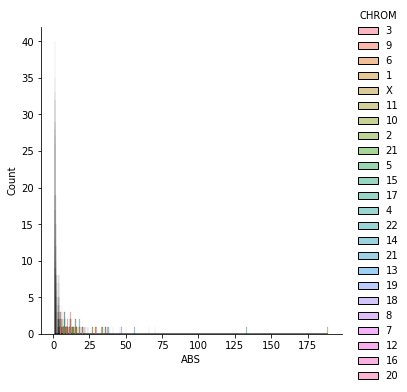

In [37]:
plt.figure(figsize=(25, 25))
sns.displot(temp, x="ABS", hue="CHROM")

<Figure size 1800x7200 with 0 Axes>

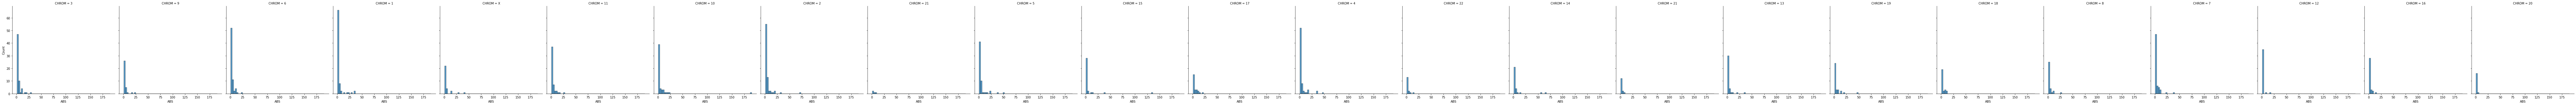

In [14]:
plt.figure(figsize=(25, 100))
plot_dist = sns.displot(
    temp, x="ABS", col="CHROM",
    binwidth=3, height=5, facet_kws=dict(margin_titles=True),
)

In [16]:
plot_dist.savefig("./sample_dist.png")

# Task 5
Z pliku wejściowego wybierz warianty, dla których pole ​ FILTER​ zawiera wartość ​ PASS​ .
Spośród tych wariantów policz ile jest heterozygotycznych (genotyp ​ 0/1​ ) z częstością
występowania w populacji (Allele Frequency) mniejszą od 0.01. Do selekcji wariantów o
niskiej częstości wykorzystaj adnotację ​ INFO:GoNLv5_AF​ .

In [13]:
!vcftools --gzvcf ./CPCT02220079.annotated.processed.vcf.gz --remove-filtered-all --keep-INFO-all --recode --recode-INFO-all --out ./all_with_pass


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ./CPCT02220079.annotated.processed.vcf.gz
	--recode-INFO-all
	--out ./all_with_pass
	--recode
	--remove-filtered-all

Using zlib version: 1.2.11
After filtering, kept 1 out of 1 Individuals
Outputting VCF file...
After filtering, kept 4472120 out of a possible 5062982 Sites
Run Time = 95.00 seconds
